In [ ]:
TITANIC SURVIVAL PREDICTION

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df=pd.read_csv('Titanic-Dataset.csv')

In [77]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
df.tail(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
df.drop(columns=['PassengerId','Pclass','Name','SibSp','Parch','Cabin'],axis=1,inplace=True)

In [83]:
df.isna().sum()

Survived      0
Sex           0
Age         177
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [84]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [85]:
df.isna().sum()

Survived    0
Sex         0
Age         0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [86]:
df['Embarked'].fillna(method='ffill',inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14432\2316060882.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Embarked'].fillna(method='ffill',inplace=True)


In [87]:
df.isna().sum()

Survived    0
Sex         0
Age         0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [88]:
df.head()

,Survived,Sex,Age,Ticket,Fare,Embarked
0,0,male,22.0,A/5 21171,7.2500,S
1,1,female,38.0,PC 17599,71.2833,C
2,1,female,26.0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,113803,53.1000,S
4,0,male,35.0,373450,8.0500,S


In [89]:
df.drop('Ticket',axis=1,inplace=True)

In [90]:
df.head()

,Survived,Sex,Age,Fare,Embarked
0,0,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,1,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,0,male,35.0,8.0500,S


In [91]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [92]:
df1 = pd.get_dummies(df, drop_first= True,dtype=int)
df1.head()

,Survived,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,1
4,0,35.0,8.0500,1,0,1


In [93]:
X=df1.drop(columns='Survived')

In [94]:
y=df1['Survived']

In [95]:
X.shape

(891, 5)

In [96]:
y.shape

(891,)

In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)


<Axes: >

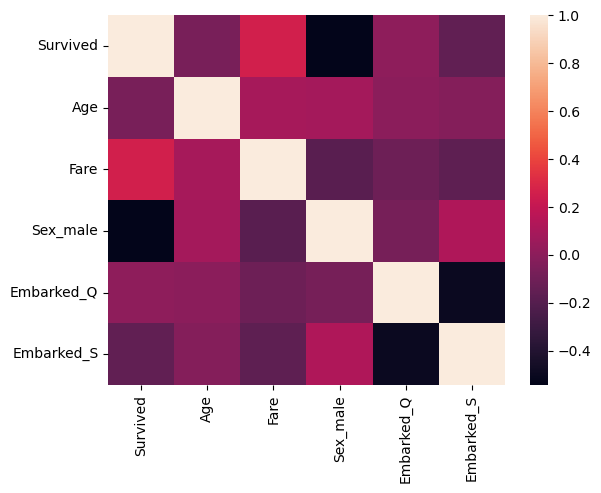

In [98]:
sns.heatmap(df1.corr())

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [101]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [103]:
model.fit(X_train,y_train)

LogisticRegression()

In [106]:
model.score(X_train,y_train)

0.7808988764044944

In [107]:
pred=model.predict(X_test)

In [108]:
from sklearn import metrics

In [109]:
metrics.accuracy_score(y_test,pred)

0.7821229050279329

In [110]:
metrics.confusion_matrix(y_test,pred)

array([[87, 17],
       [22, 53]], dtype=int64)

In [112]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       104
           1       0.76      0.71      0.73        75

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

